In [40]:
import tensorflow  as tf
from tensorflow import keras
import numpy
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [41]:
cifar = tf.keras.datasets.cifar10

In [42]:
(x_train,y_train),(x_test,y_test) = cifar.load_data()

In [43]:
x_train.shape

(50000, 32, 32, 3)

In [44]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

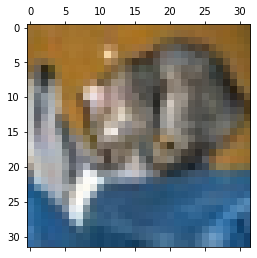

In [45]:
plt.matshow(x_test[0])

In [46]:
x_train = x_train/255
x_test = x_test/255
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [47]:
y_train = y_train.flatten()
y_test = y_test.flatten()


In [51]:
y_train[5]

1

In [57]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               393344    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.compile(optimizer="sgd",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8906 - accuracy: 0.3238 - val_loss: 1.7399 - val_accuracy: 0.3869
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7107 - accuracy: 0.3965 - val_loss: 1.6620 - val_accuracy: 0.4064
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6357 - accuracy: 0.4233 - val_loss: 1.6278 - val_accuracy: 0.4205
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5887 - accuracy: 0.4413 - val_loss: 1.5856 - val_accuracy: 0.4393
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5511 - accuracy: 0.4563 - val_loss: 1.5754 - val_accuracy: 0.4385
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5200 - accuracy: 0.4671 - val_loss: 1.5215 - val_accuracy: 0.4655
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4939 - accuracy: 0.4759 - val_loss: 1.5415 - val_accuracy:

In [60]:
test_loss,test_acc = model.evaluate(x_test,y_test)
test_loss
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 1.5035 - accuracy: 0.4696


0.46959999203681946

In [101]:
import random
predicted_val = model.predict(x_test)
n = random.randint(0,999)

313/313 [==============================] - 1s 2ms/step


In [102]:
print(predicted_val[n])
maximum = -1
index = -1
for i in (0,9):
    if maximum<predicted_val[n][i]:
        maximum = predicted_val[n][i]
        index = i
        
print(index)

[2.50278320e-02 3.77446972e-02 1.17757745e-01 3.39177623e-02
 7.99526349e-02 5.41879833e-02 7.51457363e-02 4.94925439e-01
 2.20143847e-04 8.11200067e-02]
9


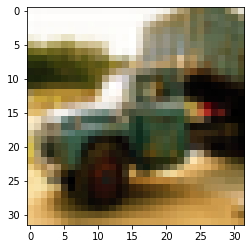

In [103]:
plt.imshow(x_test[n])

In [104]:
if index == 0:
    print("airplane")
if index == 1:
    print("automobile")
if index == 2:
    print("bird")
if index == 3:
    print("cat")
if index == 4:
    print("deer")
if index == 5:
    print("dog")
if index == 6:
    print("frog")
if index == 7:
    print("horse")
if index == 8:
    print("ship")
if index == 9:
    print("truck")

truck
